In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('~/Pycharmprojects/PredictingPatientReadmission/datasets/primary.csv')

df.head()

,Year,County,ICD Version,Total Admits (Consolidated),30-day Readmits (Consolidated),30-day Readmission Rate (Consolidated),PCPI,Population,Total Admits (Proportion),30-day Readmits (Proportion)
0,2011,Alameda,ICD-9,75103.0,11377.0,15.1,50432.0,1530893,0.049058,0.007432
1,2011,Alpine,ICD-9,13.0,1.0,7.7,54040.0,1093,0.011894,0.000915
2,2011,Amador,ICD-9,2657.0,345.0,13.0,34847.0,37539,0.070780,0.009190
3,2011,Butte,ICD-9,20422.0,3198.0,15.7,33669.0,219983,0.092834,0.014537
4,2011,Calaveras,ICD-9,3253.0,392.0,12.1,37516.0,45159,0.072034,0.008680


In [2]:
from pycaret.regression import *

In [3]:
model = setup(data = df, target = '30-day Readmission Rate (Consolidated)', normalize = True, session_id=123) 

,Description,Value
0,Session id,123
1,Target,30-day Readmission Rate (Consolidated)
2,Target type,Regression
3,Original data shape,"(684, 10)"
4,Transformed data shape,"(684, 10)"
5,Transformed train set shape,"(478, 10)"
6,Transformed test set shape,"(206, 10)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


Gradient Boosting Regressor appears to be the highest performing model for this dataset given the target variable
30-day Readmission Rate (Consolidated).

In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5221,1.4454,0.9458,0.7743,0.0934,0.0421,0.0340
et,Extra Trees Regressor,0.5809,1.6562,1.0593,0.7358,0.1092,0.0473,0.0390
rf,Random Forest Regressor,0.5898,1.8473,1.0842,0.7171,0.1298,0.0451,0.0540
huber,Huber Regressor,0.4950,2.0006,1.2489,0.7064,0.1748,0.0360,0.0130
lr,Linear Regression,0.5935,2.1616,1.2498,0.6846,0.1741,0.0428,0.4370
ridge,Ridge Regression,0.5918,2.1689,1.2507,0.6832,0.1744,0.0428,0.0120
br,Bayesian Ridge,0.5930,2.1708,1.2523,0.6829,0.1745,0.0429,0.0140
lightgbm,Light Gradient Boosting Machine,0.6021,2.4071,1.2844,0.6540,0.1754,0.0432,0.8120
ada,AdaBoost Regressor,0.8628,1.9719,1.2827,0.6531,0.0970,0.0701,0.0260
dt,Decision Tree Regressor,0.7409,2.2637,1.3205,0.6048,0.0916,0.0596,0.0120


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

Based on the Feature Importance Plot for the best performing model, it is apparent 30-day Readmits (Proportion), County, and Total Admits (Proportion) are most informative in training the model to predict the target variable 30-day Readmission Rate (Consolidated).

Although it ranks low on the feature importance plot, Per Capita Personal Income (PCPI) was shown by the mediation analysis to have a statistically significant effect on reducing the most important feature, 30-day Readmits (Proportion).

This finding is reinforced by intuitions formed through the principal component analysis (PCA), feature contributions, and K-Means clustering implemented in Exploratory_Data_Analysis_2.

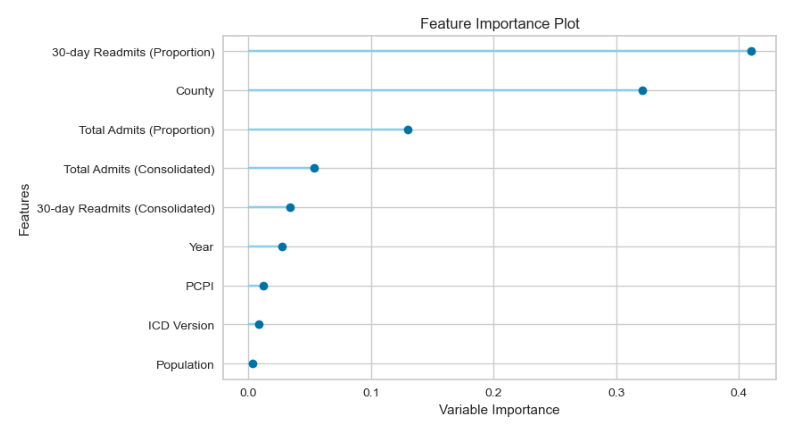

In [7]:
# Retrieve the feature importance plot with PyCaret's `plot_model`
plot_model(best, plot='feature', save=True)

# Reload the saved image and adjust its size
fig = plt.figure(figsize=(10, 8))  # Adjust the size
img = plt.imread('Feature Importance.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis to focus on the plot
plt.show()
